#**LETS GROW MORE: LGM-VIP VIRTUAL INTERNSHIP #LGMVIPAUG2021**
 **Domain: Data Science**

**Level: Beginner**

**Task 1: Iris Flowers Classification ML Project :**

***Developed by: CHAITANYA BARLA ***

DataSet LInk :

*  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/



Problem statement:


*   Predicting the class of the iris based on the four features (sepal_length,sepal_width,petal_length,petal_width)




 **IMPORTING LIBRARIES**

In [8]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns            
%matplotlib inline                


from sklearn.model_selection import train_test_split    
from numpy import median         
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

**LOADING DATASET**

In [14]:
data=pd.read_csv(r'https://raw.githubusercontent.com/chaitu983/LGM-Tasks/main/iris.data',header=None)
header_list=['sepal_length','sepal_width','petal_length','petal_width','species']
data.to_csv('iris.csv',header=header_list,index=False)
df =pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**ANALYSING THE DATASET**

In [16]:
#Inspecting The DataSet
df.shape

(150, 5)



*   *   The data set consists of 150 Rows and 5 Columns/Attributes




In [11]:
#Inspecting The DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB




*   There are 4 float and 1 Object column
*   There are no Null Values



In [17]:
#to know labels of dataframe
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
#To check count of null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
#To return statistics of dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
#to return top five rows of dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#to return how many unique values are there in each column
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [21]:
#to return unique items in the species column
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
5.4           3.4          1.7           0.2          Iris-setosa        1
5.5           2.5          4.0           1.3          Iris-versicolor    1
              2.4          3.8           1.1          Iris-versicolor    1
                                                                        ..
6.3           2.5          4.9           1.5          Iris-versicolor    1
              2.3          4.4           1.3          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
              2.9          4.3           1.3          Iris-versicolor    1
4.3           3.0          1.1           0.1          Iris-setosa        1
Length: 147, dtype: int64

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
#finding mean of species column by using groupby method
df.groupby(df.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [26]:
#finding median of species column by using groupby method
df.groupby(df.species).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


**EXPLORATORY DATA ANALYSIS**

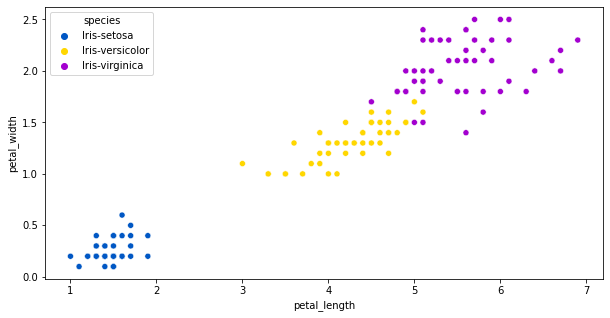

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species',palette='prism')
plt.show()

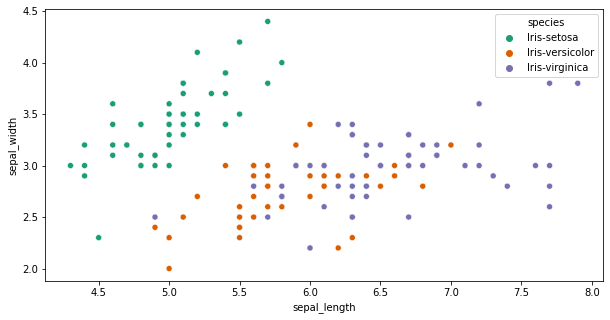

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species',palette='Dark2')
plt.show()

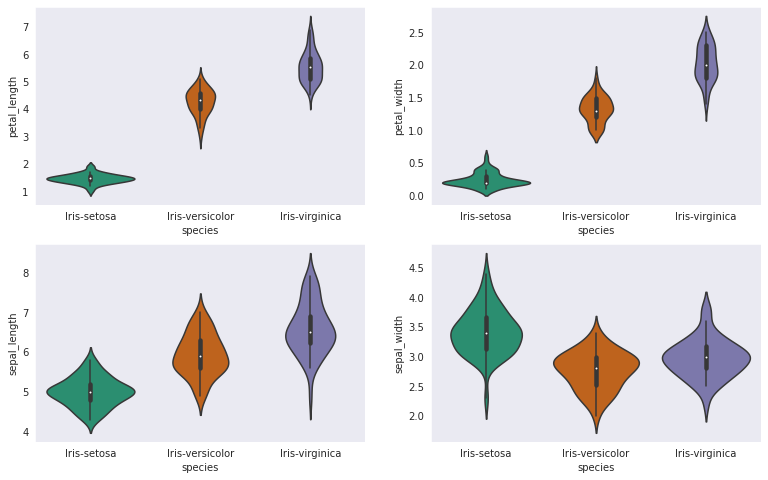

In [31]:
#To plot categorical values Violin Plot is used mostly
sns.set_style('dark')
sns.set_palette('Dark2')
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(data=df,x='species',y='petal_length')
plt.subplot(2,2,2)
sns.violinplot(data=df,x='species',y='petal_width')
plt.subplot(2,2,3)
sns.violinplot(data=df,x='species',y='sepal_length')
plt.subplot(2,2,4)
sns.violinplot(data=df,x='species',y='sepal_width')
plt.show()

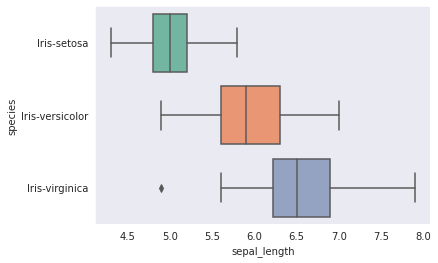

In [32]:
#Box plot is used for finding Central Tendency and Outliers
sns.set_palette('Set2')
sns.boxplot(data=df,x='sepal_length',y='species')
plt.show()

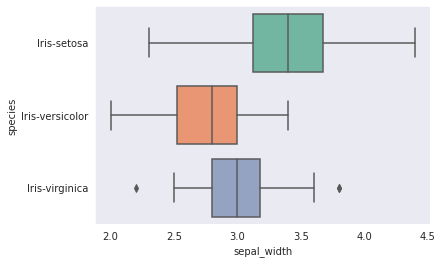

In [33]:
sns.boxplot(data=df,x='sepal_width',y='species')
plt.show()

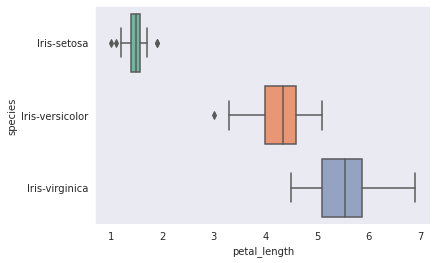

In [34]:
sns.boxplot(data=df,x='petal_length',y='species')
plt.show()

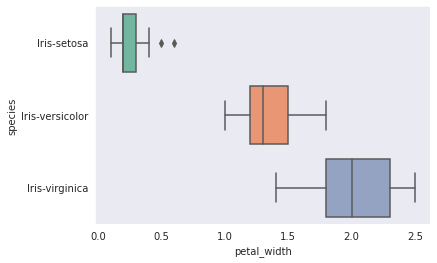

In [35]:
sns.boxplot(data=df,x='petal_width',y='species')
plt.show()

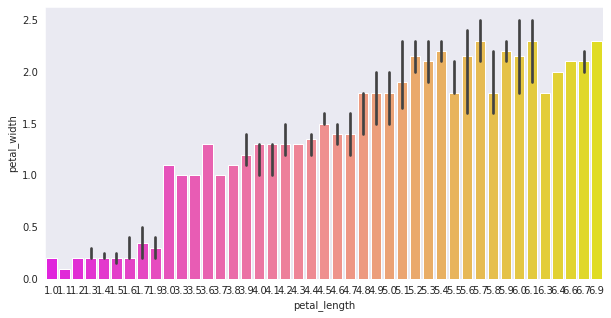

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='petal_length',y='petal_width',data=df,estimator=median,palette='spring')
plt.show()

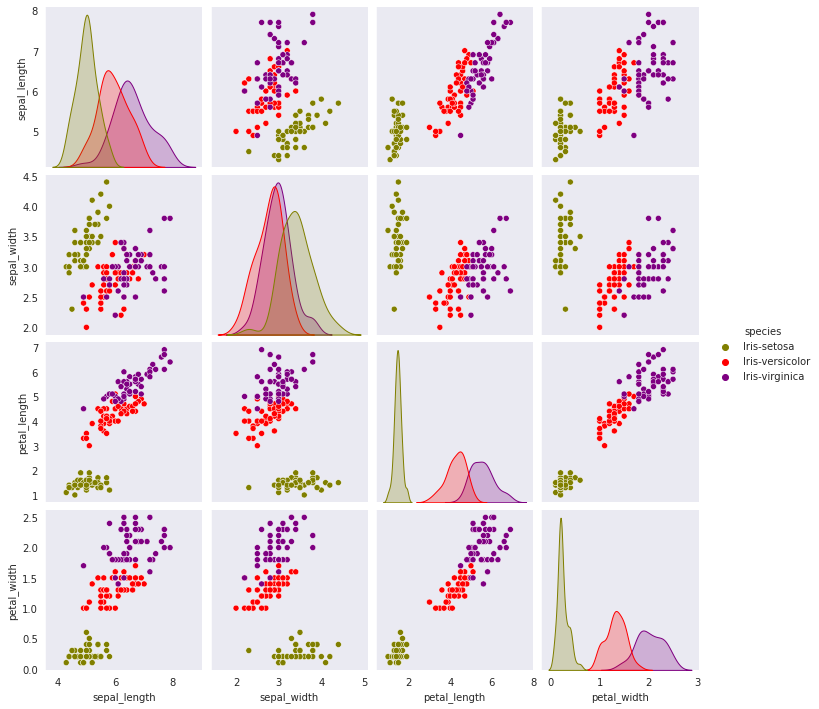

In [41]:
sns.pairplot(df,hue='species',palette='brg_r')
plt.show()

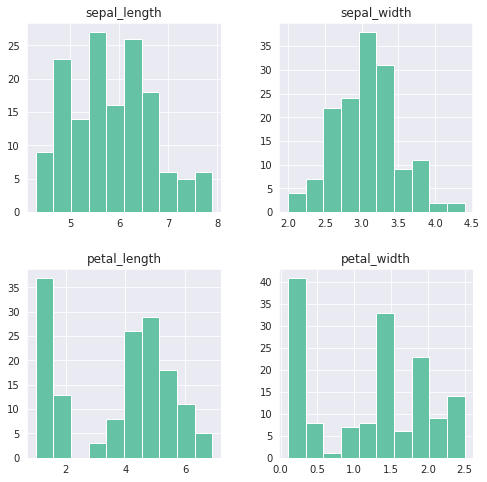

In [43]:
df.hist(figsize=(8,8));




*   Petal Length and Petal width are bimodal.
*   Sepal Length and Sepal width are unimodal and seems to be normally distributed.




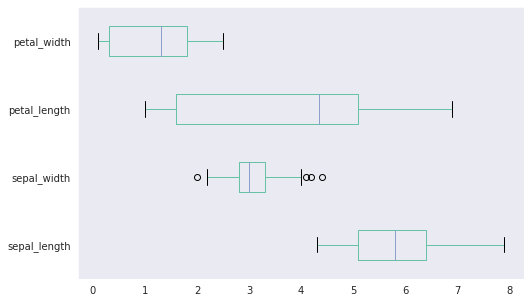

In [44]:
df.plot(kind='box',figsize=(8,5), vert=False);



*   Sepalwidth seems to have outliers.



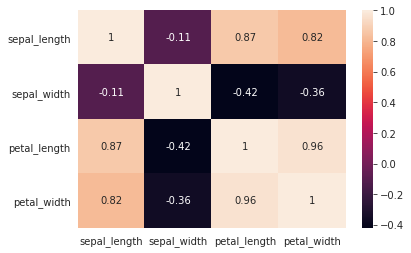

In [42]:
#plotting  heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='rocket');



*   The data seems to highly correleated with each other



**DATA PREPROCESSING**

In [48]:
#Label encoder is for converting categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
df['species'].unique()

array([0, 1, 2])

**[ SPLITTING THE DATA INTO X AND Y ]**

In [53]:
#x is feature so selection of whole rows and all columns except target column 
x=df.iloc[:,0:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
#y is target variable so we should select all rows and last column
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [56]:
y_train.head()

54     1
108    2
112    2
17     0
119    2
Name: species, dtype: int64

In [57]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [58]:
y_test.head()

14     0
98     1
75     1
16     0
131    2
Name: species, dtype: int64

In [59]:
print('Length of x_train is:',len(x_train))
print('Length of x_test is:',len(x_test))
print('Length of y_train is:',len(y_train))
print('Length of y_test is:',len(y_test))

Length of x_train is: 112
Length of x_test is: 38
Length of y_train is: 112
Length of y_test is: 38


**TRAINING THE MODEL BY DIFFERENT CLASSIFICATION ALGORITHMS**



*   **LOGISTIC REGRESSION**


In [61]:
#importing Logistic Regression from sklearn library
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

#fitting training data into model
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#By predicting the values of x_test we get y_pred values
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [64]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of Logistic Regression: \n',cm)
print('Accuracy score of Logistic Regression',accuracy_score(y_test,y_pred))

Confusion matrix of Logistic Regression: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy score of Logistic Regression 0.9736842105263158


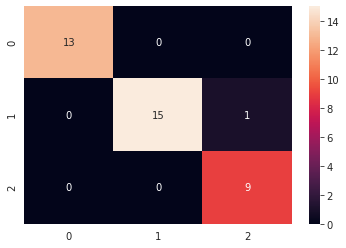

In [65]:
sns.heatmap(cm,annot=True)
plt.show()



*   **K-MEANS**





*   Finding the optimum number of clusters for k-means classification



In [66]:
x = df.iloc[:,[0,1,2,3]].values

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Plotting the results**


*   Visualize the result and check the optimal number of cluster using Elbow method


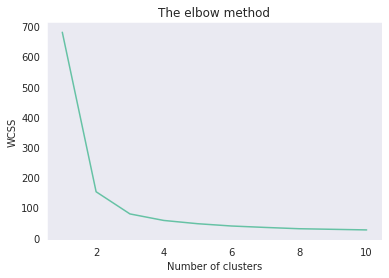

In [67]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()



*   The optimum clusters is where the elbow occurs ie at 3.




**APPLYING K-MEANS** 

In [68]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**VISUALISING THE CLUSTERS**

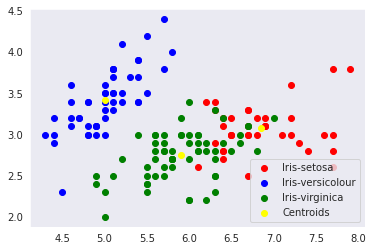

In [69]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()

**CONCLUSION**


*   From the above predictions K-MEANS model gave better accuracy.So by using this algorithm we can get good accuracy for this dataset.



                                                                          **THANK YOU**